# The Harmonic Oscillator Strikes Back

*Note:* Much of this is adapted/copied from https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html

This week we continue our adventures with the harmonic oscillator.

![1D Harmonic Oscillator](ho.png) 

The harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a restoring force F proportional to the displacement x:

$$F=-kx$$

The potential energy of this system is 

$$V = {1 \over 2}k{x^2}$$

These are sometime rewritten as

$$ F=- \omega_0^2 m x, \text{ }  V(x) = {1 \over 2} m \omega_0^2 {x^2}$$

Where $\omega_0  = \sqrt {{k \over m}} $

If the equilibrium value of the harmonic oscillator is not zero, then 

$$ F=- \omega_0^2 m (x-x_{eq}), \text{ }  V(x) = {1 \over 2} m \omega_0^2 (x-x_{eq})^2$$

## 1. Harmonic oscillator from last time (with some better defined conditions)

Applying the harmonic oscillator force to Newton's second law leads to the following second order differential equation

$$ F = m a $$

$$ F= -m \omega_0^2 (x-x_{eq}) $$

$$ a = - \omega_0^2 (x-x_{eq}) $$

$$ x(t)'' = - \omega_0^2 (x-x_{eq}) $$

The final expression can be rearranged into a second order homogenous differential equation, and can be solved using the methods we used above

This is already solved to remind you how we found these values

In [1]:
import sympy as sym
sym.init_printing()

**Note** that this time we define some of the properties of the symbols. Namely, that the frequency is always positive and real and that the positions are always real

In [2]:
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)
x(t),omega0

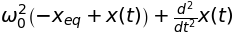

In [3]:
dfeq=sym.Derivative(x(t),t,2)+omega0**2*(x(t)-xeq)
dfeq

In [4]:
sol = sym.dsolve(dfeq)
sol

In [5]:
sol,sol.args[0],sol.args[1]

**Note** this time we define the initial positions and velocities as real

In [6]:
x0,v0=sym.symbols("x_0,v_0",real=True)
ics=[sym.Eq(sol.args[1].subs(t, 0), x0),
     sym.Eq(sol.args[1].diff(t).subs(t, 0), v0)]
ics

In [7]:
solved_ics=sym.solve(ics)
solved_ics

### 1.1 Equation of motion for $x(t)$

In [8]:
full_sol = sol.subs(solved_ics[0])
full_sol

### 1.2 Equation of motion for $p(t)$

In [9]:
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
momentum=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
momentum

## 2. Time average values for a harmonic oscillator

If we want to understand the average value of a time dependent observable, we need to solve the following integral


$${\left\langle {A(t)} \right\rangle}_t  = \begin{array}{*{20}{c}}
{\lim }\\
{\tau  \to 0}
\end{array}\frac{1}{\tau }\int\limits_0^\tau  {A(t)dt} $$

### 2.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

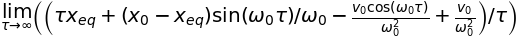

In [16]:
tau=sym.symbols("tau",nonnegative=True,real=True)
xfunc=full_sol.args[1]
xavet=(xfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
xavet

The computer does not always make the best choices the first time. If you treat each sum individually this is not a hard limit to do by hand. The computer is not smart. We can help it by inseting an `expand()` function in the statement

In [18]:
xavet=(xfunc.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
xavet

### 2.2 Excercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

In [19]:
# Your code here
#The momentum function is from exercise 1.2, I called it momentum
tau=sym.symbols("tau",nonnegative=True,real=True)
pfunc=momentum.args[1]
pavet=(pfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
pavet

### 2.3 Exercise: Calculate the average kinetic energy of a harmonic oscillator

In [20]:
# Your code here
#KE=p**2/2m
tau=sym.symbols("tau",nonnegative=True,real=True)
m=sym.symbols("m",nonnegative=True,real=True)
KE=(pfunc**2)/(2*m)
KEavet=(KE.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo).cancel()
#the expand and cancel commands should help simplify everything
KEavet

## 3.  Ensemble (Thermodynamic) Average values for a harmonic oscillator

If we want to understand the thermodynamics ensemble average value of an observable, we need to solve the following integral. 


$${\left\langle {A(t)} \right\rangle}_{T}  = \frac{\int{A e^{-\beta H}dqdp}}{\int{e^{-\beta H}dqdp} } $$

You can think of this as a Temperature average instead of a time average.

Here $\beta=\frac{1}{k_B T}$ and the classical Hamiltonian, $H$ is

$$ H = \frac{p^2}{2 m} + V(q)$$

**Note** that the factors of $1/h$ found in the classical partition function cancel out when calculating average values

### 3.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

For a harmonic oscillator with equilibrium value $x_{eq}$, the Hamiltonian is 
$$ H = \frac{p^2}{2 m} + \frac{1}{2} m \omega_0 (x-x_{eq})^2 $$

First we will calculate the partition function $\int{e^{-\beta H}dqdp}$

In [21]:
from sympy import *

In [23]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
#solve for the denominator
#den=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
#den
#For some reason this integral cannot be solved on my laptop

Then we can calculate the numerator $\int{A e^{-\beta H}dqdp}$


In [25]:
#numx=sym.integrate(xT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
#numx

And now the average value

In [26]:
#xaveT=numx/den
#xaveT

### 3.2 Exercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

After calculating the value, explain why you think you got this number 

In [29]:
#denominator
k,T=sym.symbols("k,T")
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
#z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
#z

In [30]:
#numerator
#nump=sym.integrate(pT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))

In [31]:
#averagevalue
#paveT=nump/z
#paveT

### 3.3 Exercise: Calculate the average kinetic energy

The answer you get here is a well known result related to the energy equipartition theorem

In [32]:
#denominator
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
#z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
#z

In [33]:
#numerator
#numKE=sym.integrate(KE*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))

In [34]:
#averagevalue
#KEaveT=numKE/z
#KEaveT

# Back to the lecture

## 4. Exercise Verlet integrators

In this exercise we will write a routine to solve for the equations of motion for a hamonic oscillator.

Plot the positions and momenta (seprate plots) of the harmonic oscillator as a functions of time.

Calculaate trajectories using the following methods:
1. Exact solution
2. Simple taylor series expansion
3. Predictor-corrector method
4. Verlet algorithm
5. Leapfrog algorithm
6. Velocity Verlet algorithm

In [22]:
# Your code here
# plot position
%matplotlib inline

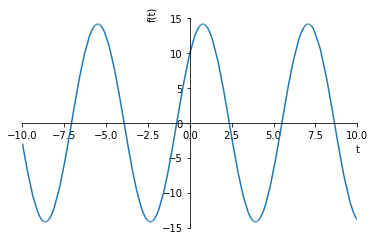

In [48]:
#position
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)
#full_sol
full_sol1 = sym.simplify(full_sol.subs({x0:10, xeq:0 , v0:10, omega0:1}))
#full_sol1
sym.plot(full_sol1.rhs,(t,-10,10))

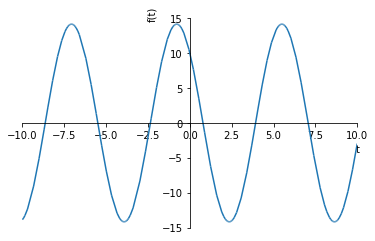

In [54]:
#momentum
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
momentum=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
#momentum
momentum1=sym.simplify(momentum.subs({x0:10, xeq:0, v0:10, omega0:1, m:1}))
#momentum1
sym.plot(momentum1.rhs,(t,-10,10))

In [ ]:
#1:Exact Solution

In [31]:
#2a: Simple Taylor Series Expansion
#X_t=X_t0+(p_to/m)*(tf-ti)
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define the variable and the function to approximate
x_t0,p_t0,m,t=sym.symbols("x_t0,p_t0,m,t", positive=True,nonnegative=True,real=True)
x_t=x_t0+(p_t0/m)*(t)

def function(x_t):
    i = 0
    x_t0 = 0
    p_t0 = 1
    m = 1
    t = 1
    while t <= 10:
        x_t = x_t0+(p_t0/m)*(t)
        t += 1
        x_t=x_t0
    return x_t
    sym.plot(x_t.rhs,(t,0,10))

In [ ]:
#2b: Simple Taylor Series Expansion: Momentum
#p_t=p_t0+m*a_t0*(tf-ti)
#2a: Simple Taylor Series Expansion
#X_t=X_t0+(p_to/m)*(tf-ti)
import sympy as sym
x_t0,p_t0,m,t=sym.symbols("x_t0,p_t0,m,t", positive=True,nonnegative=True,real=True)
x_t=sym.Function("x_t")
if (x_t0 < 0.0):
    Print("This is not possible!! You are a fool!!!")
else:
    i = 1
    x_t0 = 0
    p_t0=1
    m=1
    t=0
    x_t=x_t0+(p_t0/m)*(t)
while (x_t<10):
    x_t = x_t0
    break

sym.plot((x_t0+(p_t0/m)*(t)),(t,0,10))

In [ ]:
#3: Predictor-Corrected Method

In [ ]:
#4: Verlet Algorithm

In [ ]:
#5: Leapfrog Algorithm

In [ ]:
#6: Velocity Verlet Algorithm